<a href="https://colab.research.google.com/github/ruthreich-star/LoanDefault/blob/main/LoanDefaultFeatureEngeniring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from google.colab import files
import pickle
import os
from scipy import stats
from scipy.stats import zscore

!pip install missingno
import missingno as msno

!pip install fancyimpute
import fancyimpute

!pip install --upgrade autoviz
from autoviz.AutoViz_Class import AutoViz_Class

warnings.filterwarnings("ignore")
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=baddc8f71932b461d5c79dfdb06888a662619d28a714ee37451625c1318a265d
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=61afd348fde6f4ffa291a8bfc41736203180a538f2785f0094a62652f832a0f1
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
BG_BLACK = "\033[40m"
BG_RED = "\033[41m"
BG_GREEN = "\033[42m"
BG_YELLOW = "\033[43m"
BG_BLUE = "\033[44m"
BG_MAGENTA = "\033[45m"
BG_CYAN = "\033[46m"
BG_WHITE = "\033[47m"
BG_DARK_GRAY = "\033[100m"
BG_BRIGHT_RED = "\033[101m"
BG_BRIGHT_GREEN = "\033[102m"
BG_BRIGHT_YELLOW = "\033[103m"
BG_BRIGHT_BLUE = "\033[104m"
BG_BRIGHT_MAGENTA = "\033[105m"
BG_BRIGHT_CYAN = "\033[106m"
BG_WHITE = "\033[107m"
RESET = "\033[0m" # Reset all formatting

In [3]:
np.random.seed(31071967)

In [4]:
download_pickels = True

In [5]:
import os, pathlib, sys
!mkdir -p pickles
pickle_file = '/content/pickles/load_default_datacleansing_clean.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df = pd.read_pickle(pickle_file)

df.head(10)

Saving load_default_datacleansing_clean (1).pkl to load_default_datacleansing_clean (1).pkl


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d
1,545583,2500.0,2500.0,2500.0,36 months,13.98,85.0,4.0,RENT,20004.0,Not Verified,other,MI,19.86,0.0,5.0,7.0,0.0,981.0,21.30,10.0,3075.0,3075.0,2500.0,575.0,91.0,0,2010.0,7.0,2005.0,8.0,2013.0,7.0,2016.0,6.0,2010-07-01
2,532101,5000.0,5000.0,5000.0,36 months,15.95,176.0,4.0,RENT,59000.0,Not Verified,debt_consolidation,NY,19.57,0.0,1.0,7.0,0.0,18773.0,99.90,15.0,2949.0,2949.0,1909.0,874.0,176.0,1,2010.0,6.0,1994.0,4.0,2011.0,11.0,2012.0,3.0,2010-06-01
3,877788,7000.0,7000.0,7000.0,36 months,9.91,226.0,10.0,MORTGAGE,53796.0,Not Verified,other,TX,10.80,3.0,3.0,7.0,0.0,3269.0,47.20,20.0,8082.0,8082.0,7000.0,1082.0,1550.0,0,2011.0,9.0,1998.0,3.0,2014.0,3.0,2014.0,3.0,2011-09-01
4,875406,2000.0,2000.0,2000.0,36 months,5.42,60.0,10.0,RENT,30000.0,Not Verified,debt_consolidation,NY,3.60,0.0,0.0,7.0,0.0,0.0,0.00,15.0,2162.0,2162.0,2000.0,162.0,53.0,0,2011.0,9.0,1975.0,1.0,2014.0,2.0,2016.0,6.0,2011-09-01
5,506439,3600.0,3600.0,3600.0,36 months,10.25,117.0,10.0,MORTGAGE,675048.0,Not Verified,other,AL,1.55,0.0,4.0,8.0,0.0,0.0,0.00,25.0,4206.0,4206.0,3600.0,606.0,147.0,0,2010.0,4.0,1998.0,4.0,2013.0,5.0,2016.0,6.0,2010-04-01
6,981465,8000.0,8000.0,8000.0,36 months,6.03,243.0,10.0,MORTGAGE,77736.0,Verified,other,AZ,6.07,0.0,0.0,12.0,0.0,4182.0,13.60,49.0,8725.0,8725.0,8000.0,725.0,1424.0,0,2011.0,10.0,1996.0,7.0,2014.0,4.0,2014.0,4.0,2011-10-01
7,749050,6000.0,6000.0,6000.0,36 months,7.49,187.0,3.0,RENT,35000.0,Not Verified,debt_consolidation,MO,13.13,0.0,0.0,5.0,0.0,5864.0,47.70,9.0,6718.0,6718.0,6000.0,718.0,211.0,0,2011.0,5.0,2003.0,10.0,2014.0,5.0,2014.0,5.0,2011-05-01
8,1016373,25600.0,25600.0,25473.0,60 months,14.27,599.0,4.0,RENT,86000.0,Verified,debt_consolidation,NY,26.51,0.0,1.0,16.0,0.0,33021.0,70.80,32.0,32840.0,32659.0,25600.0,7240.0,16084.0,0,2011.0,11.0,1983.0,10.0,2014.0,4.0,2016.0,6.0,2011-11-01
9,786870,19750.0,19750.0,19750.0,60 months,23.22,559.0,10.0,MORTGAGE,72500.0,Verified,debt_consolidation,MO,19.96,0.0,0.0,15.0,0.0,21544.0,98.70,44.0,27545.0,27545.0,19750.0,7795.0,15264.0,0,2011.0,6.0,1992.0,3.0,2013.0,6.0,2016.0,2.0,2011-06-01
10,1019261,6250.0,6250.0,6250.0,36 months,17.27,224.0,4.0,MORTGAGE,28000.0,Verified,other,OH,13.76,0.0,0.0,2.0,1.0,0.0,8.46,15.0,6689.0,6689.0,4764.0,1713.0,224.0,1,2011.0,11.0,1999.0,10.0,2014.0,4.0,2014.0,9.0,2011-11-01


In [6]:
pickle_file = '/content/pickles/drop_earliest_cr_line.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df_date = pd.read_pickle(pickle_file)

df_date.head(100)

,id,earliest_cr_line,repay_fail
1,545583,2005-08-01,0
2,532101,1994-04-01,1
3,877788,1998-03-01,0
4,875406,1975-01-01,0
5,506439,1998-04-01,0
6,981465,1996-07-01,0
7,749050,2003-10-01,0
8,1016373,1983-10-01,0
9,786870,1992-03-01,0
10,1019261,1999-10-01,1


In [7]:
df_orig = df.copy()

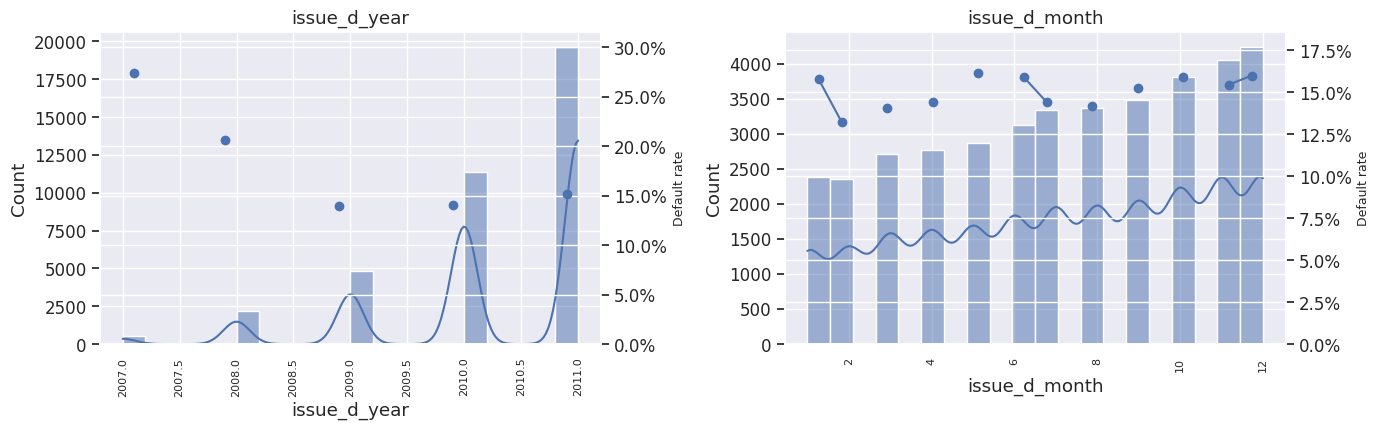

In [8]:
import pandas as pd
import numpy as np
import math, numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
date_cols = ['issue_d_year','issue_d_month'] #,'months_between_earliest_to_issue','months_between_las_p_to_issue']

plot_cols = 3
plot_rows = math.ceil(len(date_cols) / plot_cols)
bins_num = 20  # אפשר לשנות לפי הצורך

sns.set(font_scale=1.1)
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(20, 4.5*plot_rows))
axes = np.array(axes).reshape(plot_rows, plot_cols)

for i, col in enumerate(date_cols):
    r, c = divmod(i, plot_cols)
    ax = axes[r, c]

    # נתונים נומריים לעמודה (ממיר לטובת plotting; NaN נשמר)
    x = pd.to_numeric(df[col], errors='coerce')

    # אם אין מספיק נתונים — דלגי בנימוס
    if x.dropna().shape[0] < 5:
        ax.text(0.5, 0.5, "לא מספיק נתונים", ha='center', va='center', transform=ax.transAxes)
        ax.set_title(col); ax.set_xticks([]); ax.set_yticks([])
        continue

    # קביעת גבולות היסטוגרמה (כדי להשתמש באותם BINS גם לאחוז הכשל)
    bin_edges = np.histogram_bin_edges(x.dropna(), bins=bins_num)

    # היסטוגרמה + KDE
    sns.histplot(x=x, bins=bin_edges, kde=True, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)

    # חישוב אחוז כשל לכל BIN
    cats = pd.cut(x, bins=bin_edges, include_lowest=True)
    # מניחים ש-repay_fail הוא 0/1 כפי שציינת
    fail_rate = df['repay_fail'].groupby(cats).mean()

    # מרכזי ה-BINs לקו
    centers = np.array([(iv.left + iv.right) / 2 for iv in fail_rate.index])

    # קו אחוז כשל על ציר Y משני
    ax2 = ax.twinx()
    ax2.plot(centers, fail_rate.values, marker='o', linewidth=1.5)
    ax2.set_ylim(0, max(0.01, np.nanmax(fail_rate.values) * 1.15))
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax2.set_ylabel('Default rate', fontsize=9)

# העלמת צירים ריקים (אם מספר המשבצות גדול ממספר העמודות)
for j in range(i+1, plot_rows*plot_cols):
    r, c = divmod(j, plot_cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

In [11]:
df.head(1000)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d
1,545583,2500.0,2500.0,2500.0,36 months,13.98,85.0,4.0,RENT,20004.0,Not Verified,other,MI,19.86,0.0,5.0,7.0,0.0,981.0,21.30,10.0,3075.0,3075.0,2500.0,575.0,91.0,0,2010.0,7.0,2005.0,8.0,2013.0,7.0,2016.0,6.0,2010-07-01
2,532101,5000.0,5000.0,5000.0,36 months,15.95,176.0,4.0,RENT,59000.0,Not Verified,debt_consolidation,NY,19.57,0.0,1.0,7.0,0.0,18773.0,99.90,15.0,2949.0,2949.0,1909.0,874.0,176.0,1,2010.0,6.0,1994.0,4.0,2011.0,11.0,2012.0,3.0,2010-06-01
3,877788,7000.0,7000.0,7000.0,36 months,9.91,226.0,10.0,MORTGAGE,53796.0,Not Verified,other,TX,10.80,3.0,3.0,7.0,0.0,3269.0,47.20,20.0,8082.0,8082.0,7000.0,1082.0,1550.0,0,2011.0,9.0,1998.0,3.0,2014.0,3.0,2014.0,3.0,2011-09-01
4,875406,2000.0,2000.0,2000.0,36 months,5.42,60.0,10.0,RENT,30000.0,Not Verified,debt_consolidation,NY,3.60,0.0,0.0,7.0,0.0,0.0,0.00,15.0,2162.0,2162.0,2000.0,162.0,53.0,0,2011.0,9.0,1975.0,1.0,2014.0,2.0,2016.0,6.0,2011-09-01
5,506439,3600.0,3600.0,3600.0,36 months,10.25,117.0,10.0,MORTGAGE,675048.0,Not Verified,other,AL,1.55,0.0,4.0,8.0,0.0,0.0,0.00,25.0,4206.0,4206.0,3600.0,606.0,147.0,0,2010.0,4.0,1998.0,4.0,2013.0,5.0,2016.0,6.0,2010-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,716110,30000.0,30000.0,30000.0,60 months,16.40,736.0,2.0,MORTGAGE,172008.0,Source Verified,debt_consolidation,CA,9.57,0.0,2.0,4.0,0.0,36216.0,7.64,27.0,8866.0,8866.0,3460.0,3884.0,736.0,1,2011.0,4.0,1997.0,12.0,2012.0,2.0,2012.0,7.0,2011-04-01
998,472163,15250.0,15250.0,14660.0,36 months,12.53,510.0,1.0,MORTGAGE,33600.0,Not Verified,debt_consolidation,NY,19.21,1.0,1.0,16.0,0.0,7645.0,41.90,26.0,18142.0,17387.0,15250.0,2892.0,4898.0,0,2010.0,1.0,1999.0,8.0,2012.0,4.0,2012.0,4.0,2010-01-01
999,653426,16750.0,16750.0,16725.0,60 months,19.74,441.0,5.0,RENT,48000.0,Verified,debt_consolidation,GA,19.65,0.0,1.0,11.0,0.0,12957.0,55.80,18.0,26473.0,26434.0,16750.0,9723.0,1803.0,0,2011.0,1.0,2005.0,7.0,2015.0,10.0,2016.0,6.0,2011-01-01
1000,845321,11000.0,11000.0,11000.0,36 months,16.89,392.0,7.0,MORTGAGE,50000.0,Source Verified,major_purchase,MI,15.31,1.0,0.0,7.0,0.0,11832.0,85.10,17.0,14097.0,14097.0,11000.0,3097.0,417.0,0,2011.0,8.0,2001.0,6.0,2014.0,8.0,2014.0,8.0,2011-08-01


In [9]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d
count,3.847800e+04,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,3.847800e+04,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478
mean,6.650325e+05,10886.218432,10658.265844,10093.117253,12.076477,318.074854,6.597585e+04,13.441115,0.141124,1.035787,9.292574,0.055074,13634.757412,49.217076,21.890144,11835.162387,11242.016979,9564.060329,2186.057737,2604.890504,0.151463,2010.233042,7.131816,1996.584100,6.878424,2012.703623,6.467462,2014.240995,6.148345,2010-09-28 18:00:10.104475136
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,16.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3379.368734,0.000000,2007.000000,1.000000,1946.000000,1.000000,2007.000000,1.000000,2007.000000,1.000000,2007-06-01 00:00:00
25%,4.983722e+05,5500.000000,5400.000000,5000.000000,9.630000,168.000000,4.100000e+04,8.670000,0.000000,0.000000,6.000000,0.000000,3900.000000,27.600000,14.000000,5598.000000,5121.000000,4700.000000,687.000000,217.000000,0.000000,2010.000000,4.000000,1993.000000,4.000000,2012.000000,3.000000,2013.000000,4.000000,2010-04-01 00:00:00
50%,6.443430e+05,10000.000000,9950.000000,8975.000000,11.990000,283.000000,6.000000e+04,13.526886,0.000000,1.000000,9.000000,0.000000,9280.500000,49.500000,20.924792,10138.500000,9399.500000,8325.000000,1376.000000,568.000000,0.000000,2011.000000,7.000000,1998.000000,7.000000,2013.000000,6.000000,2015.000000,6.000000,2011-01-01 00:00:00
75%,8.265722e+05,14950.000000,14275.000000,13606.000000,14.380000,409.000000,8.000000e+04,18.430000,0.000000,2.000000,12.000000,0.000000,17066.748695,71.300000,28.000000,15593.000000,14916.750000,12550.000000,2665.000000,3382.500000,0.000000,2011.000000,10.000000,2001.000000,10.000000,2014.000000,9.000000,2016.000000,8.000000,2011-08-01 00:00:00
max,1.077430e+06,35000.000000,35000.000000,35000.000000,24.110000,1305.000000,1.080000e+06,29.990000,7.000000,20.000000,35.000000,3.000000,385489.000000,108.800000,76.000000,58564.000000,58564.000000,35000.000000,23611.000000,35596.000000,1.000000,2011.000000,12.000000,2008.000000,12.000000,2016.000000,12.000000,2016.000000,12.000000,2011-12-01 00:00:00
std,2.191854e+05,7067.995600,6840.491293,6839.603557,3.564023,199.352393,4.179952e+04,6.491313,0.459140,1.343763,4.238107,0.229813,17966.258301,27.393326,11.017620,8640.311079,8608.288468,6764.535821,2460.981998,4245.279484,0.358504,0.962635,3.416248,6.832742,3.536742,1.610677,3.423837,1.864642,2.936946,NaN


In [10]:
df['loan_amnt']       = pd.to_numeric(df['loan_amnt'], errors='coerce').round().astype('Int64')
df['funded_amnt']     = pd.to_numeric(df['funded_amnt'], errors='coerce').round().astype('Int64')
df['funded_amnt_inv'] = pd.to_numeric(df['funded_amnt_inv'], errors='coerce').round().astype('Int64')
loan_amnt        = pd.to_numeric(df['loan_amnt'], errors='coerce')
funded_amnt      = pd.to_numeric(df['funded_amnt'], errors='coerce')
funded_amnt_inv  = pd.to_numeric(df['funded_amnt_inv'], errors='coerce')


# # עמודות חדשות
# df['platform_share'] = funded_amnt - funded_amnt_inv          # כמה מומן לא ע"י משקיעים (פלטפורמה)
# df['underfunded']    = loan_amnt - funded_amnt                # כמה לא גויס ביחס לסכום ההלוואה


# gap_platform = funded_amnt - funded_amnt_inv   # חלק שמומן לא ע"י משקיעים
# gap_under    = loan_amnt   - funded_amnt       # פער מימון לעומת סכום ההלוואה

# #df['platform_share_1'] = np.where(gap_platform > 100, gap_platform, 0)
# #df['underfunded_1']    = np.where(gap_under    > 100, gap_under,    0)

# # אופציונלי: המרה לשלם (אם אין צורך בשברים)


# # אופציונלי: להבטיח שאין ערכים שליליים (במקרה של רעש/עיגול)
# df[['platform_share', 'underfunded']] = df[['platform_share', 'underfunded']].clip(lower=0)

# # בדיקה קצרה
# print(df[['loan_amnt','funded_amnt','funded_amnt_inv','platform_share','underfunded']].head(50))

In [ ]:
# # כמה פעמים שלושתם שווים
# eq_all = (df['loan_amnt'] == df['funded_amnt']) & (df['funded_amnt'] == df['funded_amnt_inv'])
# print("all equal:", eq_all.sum())
# print("all equal:", eq_all.mean())
# # האם יש פער בין funded_amnt ל-loan_amnt
# print("funded < loan:", (df['funded_amnt'] < df['loan_amnt']).sum())

# # האם יש חלק שמומן לא ע\"י משקיעים (פלטפורמה)
# gap = df['funded_amnt'] - df['funded_amnt_inv']
# print("platform-funded (>0):", (gap > 0).sum())
# print(gap.describe())


In [ ]:
# feature = "platform_share"
# target = "repay_fail"
# plt.figure(figsize=(8,4))
# sns.boxplot(x=target, y=feature, data=df)
# plt.title(f"{feature} vs {target}")
# plt.show()

In [ ]:
# feature = "underfunded"
# target = "repay_fail"
# plt.figure(figsize=(8,4))
# sns.boxplot(x=target, y=feature, data=df)
# plt.title(f"{feature} vs {target}")
# plt.show()


In [ ]:
# # plot values
# cat_cols      = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
# plot_columns = 3
# plot_rows = (len(cat_cols)//plot_columns) + len(cat_cols)%plot_columns

# fig = plt.figure(figsize=(20,15))
# plt.subplots_adjust(hspace=0.8)
# plt.xticks(rotation=90, ha='center')  # אחרי הקריאה ל-sns.barplot/plt.bar
# plt.tight_layout()
# sns.set(font_scale=1.2)

# for plot_counter, col in enumerate(cat_cols, start=1):
#     plt.subplot(plot_rows, plot_columns, plot_counter)
#     sns.histplot(x=col, data=df, kde=True)

# plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        38478 non-null  int64         
 1   loan_amnt                 38478 non-null  Int64         
 2   funded_amnt               38478 non-null  Int64         
 3   funded_amnt_inv           38478 non-null  Int64         
 4   term                      38478 non-null  category      
 5   int_rate                  38478 non-null  float64       
 6   installment               38478 non-null  float64       
 7   emp_length                38478 non-null  category      
 8   home_ownership            38478 non-null  category      
 9   annual_inc                38478 non-null  float64       
 10  verification_status       38478 non-null  category      
 11  purpose                   38478 non-null  category      
 12  addr_state             

In [ ]:
df_orig.info()

Data Improvement Actions

In [11]:
cont_cols_orig      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']
corr_matrix = df[cont_cols_orig].corr()   #(method='spearman')
corr_matrix


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec
loan_amnt,1.000000,0.984896,0.947855,0.281018,0.933938,0.370552,0.071017,-0.048223,-0.052120,0.175485,0.274458,0.071952,0.253985,0.893278,0.865521,0.862032,0.736210,0.453230,-0.061484
funded_amnt,0.984896,1.000000,0.962514,0.283091,0.956029,0.369106,0.070194,-0.049745,-0.051141,0.173794,0.271443,0.075359,0.248537,0.906342,0.878322,0.877160,0.740647,0.457606,-0.063199
funded_amnt_inv,0.947855,0.962514,1.000000,0.271845,0.906154,0.352826,0.075028,-0.057254,-0.084023,0.160144,0.240448,0.074498,0.243376,0.889116,0.917616,0.857774,0.735449,0.453474,-0.062438
int_rate,0.281018,0.283091,0.271845,1.000000,0.258068,0.047722,0.124650,0.144944,0.181189,0.008779,0.080006,0.473348,-0.055628,0.278949,0.270647,0.160119,0.508702,0.143894,0.090045
installment,0.933938,0.956029,0.906154,0.258068,1.000000,0.375592,0.059359,-0.036699,-0.033618,0.172535,0.284280,0.101588,0.229561,0.857724,0.820549,0.855643,0.634300,0.408890,-0.057321
annual_inc,0.370552,0.369106,0.352826,0.047722,0.375592,1.000000,-0.113817,0.014199,0.006511,0.235093,0.371299,0.040715,0.334785,0.353934,0.341267,0.359110,0.250165,0.187778,-0.027547
dti,0.071017,0.070194,0.075028,0.124650,0.059359,-0.113817,1.000000,-0.033485,0.021571,0.307806,0.228175,0.282381,0.249176,0.067170,0.071448,0.042806,0.111241,0.003673,-0.000200
delinq_2yrs,-0.048223,-0.049745,-0.057254,0.144944,-0.036699,0.014199,-0.033485,1.000000,0.002641,0.009339,-0.060914,-0.045631,0.060216,-0.037151,-0.044554,-0.050579,0.006668,-0.021304,-0.009034
inq_last_6mths,-0.052120,-0.051141,-0.084023,0.181189,-0.033618,0.006511,0.021571,0.002641,1.000000,0.084424,-0.019875,-0.041116,0.075800,-0.072804,-0.094090,-0.085841,-0.026421,-0.010436,0.051924
open_acc,0.175485,0.173794,0.160144,0.008779,0.172535,0.235093,0.307806,0.009339,0.084424,1.000000,0.280774,-0.077981,0.697246,0.160259,0.149778,0.158920,0.122465,0.074198,0.002883


In [ ]:
df.info()

In [12]:
def build_dt(year_col, month_col):
    # נבנה מחרוזת 'YYYY-MM-01' רק כששנה וחודש קיימים
    y = df[year_col].astype('Int64')
    m = df[month_col].astype('Int64')
    s = (
        y.astype('string').str.zfill(4) + '-' +
        m.astype('string').str.zfill(2) + '-01'
    )
    # אם חסר שנה/חודש התוצאה תהיה 'NaT'
    s = s.mask(y.isna() | m.isna())
    return pd.to_datetime(s, errors='coerce', format='%Y-%m-%d')

df['last_pymnt_d']      = build_dt('last_pymnt_d_year', 'last_pymnt_d_month')


In [13]:
import pandas as pd

# keep only the needed columns
tmp = df_date[['id', 'earliest_cr_line']].copy()

# ensure one row per id (take the earliest if duplicates)
tmp['earliest_cr_line'] = pd.to_datetime(tmp['earliest_cr_line'], errors='coerce')


# align dtypes for the key
df['id'] = df['id'].astype(df_date['id'].dtype)

# left-merge the single column
df = df.merge(tmp, on='id', how='left')


In [14]:


# ודאי ששדות התאריך הם datetime
df['issue_d']        = pd.to_datetime(df['issue_d'], errors='coerce', format='mixed')
df['last_pymnt_d']   = pd.to_datetime(df['last_pymnt_d'], errors='coerce', format='mixed')

# חישוב חודשים שלמים עם מסכה לחסרים
mask = df['last_pymnt_d'].notna() & df['issue_d'].notna()
months = pd.Series(pd.NA, index=df.index, dtype='Int64')
months[mask] = ((df.loc[mask, 'last_pymnt_d'].dt.year  - df.loc[mask, 'issue_d'].dt.year)  * 12 +
                (df.loc[mask, 'last_pymnt_d'].dt.month - df.loc[mask, 'issue_d'].dt.month)).astype(int)

df['months_between_las_p_to_issue'] = months

# המרות ל-datetime (התאריכים אצלך נראים day-first)
df['issue_d']          = pd.to_datetime(df['issue_d'],          errors='coerce', dayfirst=True)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce', dayfirst=True)

# תיקון מקרים של שנה דו-ספרתית שזינקה למאה ה-21 (2067/2068 וכו')
mask_fix = (
    df['earliest_cr_line'].notna() &
    df['issue_d'].notna() &
    (df['earliest_cr_line'] > df['issue_d'])
)
df.loc[mask_fix, 'earliest_cr_line'] = df.loc[mask_fix, 'earliest_cr_line'] - pd.DateOffset(years=100)

# חישוב מחדש של החודשים (שלמים)
mask = df['earliest_cr_line'].notna() & df['issue_d'].notna()
months = pd.Series(pd.NA, index=df.index, dtype='Int64')
months[mask] = (
    (df.loc[mask, 'issue_d'].dt.year  - df.loc[mask, 'earliest_cr_line'].dt.year) * 12 +
    (df.loc[mask, 'issue_d'].dt.month - df.loc[mask, 'earliest_cr_line'].dt.month)
).astype(int)
# מספר חודשים בין תאריך לקיחת אשראי ראשונה לתאריך לקיחת הלוואה נכחי
df['months_between_earliest_to_issue'] = months


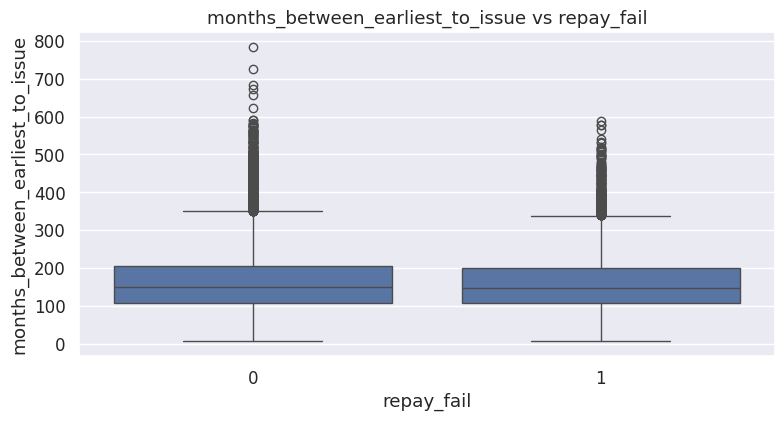

In [15]:
feature = "months_between_earliest_to_issue"
target = "repay_fail"
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y=feature, data=df)
plt.title(f"{feature} vs {target}")
plt.show()

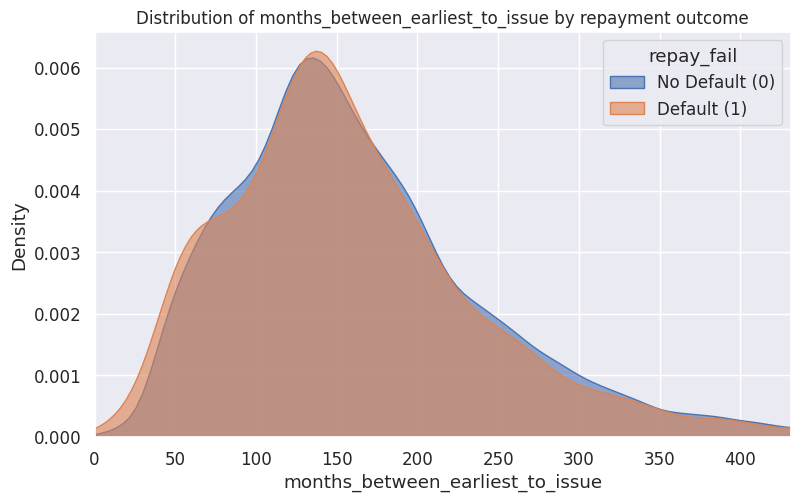

In [16]:
plt.figure(figsize=(8,5))

# KDE (density) plot
sns.kdeplot(data=df[df['repay_fail'] == 0], x='months_between_earliest_to_issue',
            label='No Default (0)', shade=True, alpha=0.6)
sns.kdeplot(data=df[df['repay_fail'] == 1], x='months_between_earliest_to_issue',
            label='Default (1)', shade=True, alpha=0.6)

plt.title("Distribution of months_between_earliest_to_issue by repayment outcome", fontsize=12)
plt.xlabel("months_between_earliest_to_issue")
plt.ylabel("Density")
plt.legend(title="repay_fail")
plt.xlim(0, df['months_between_earliest_to_issue'].quantile(0.99))  # חותך חריגים גבוהים
plt.grid(True)
plt.show()


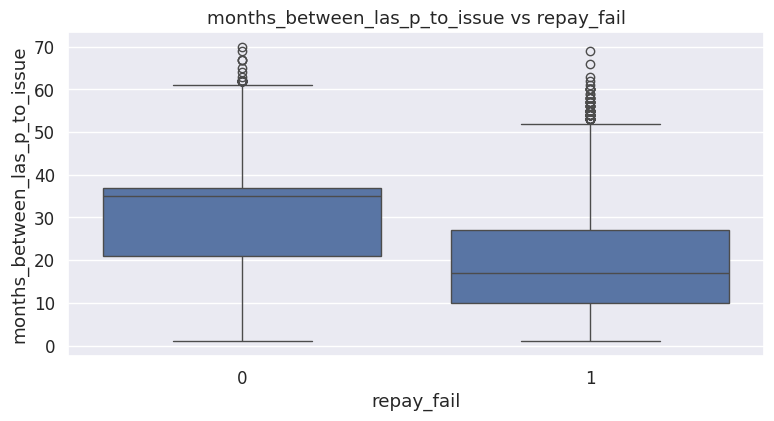

In [17]:
feature = "months_between_las_p_to_issue"
target = "repay_fail"
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y=feature, data=df)
plt.title(f"{feature} vs {target}")
plt.show()

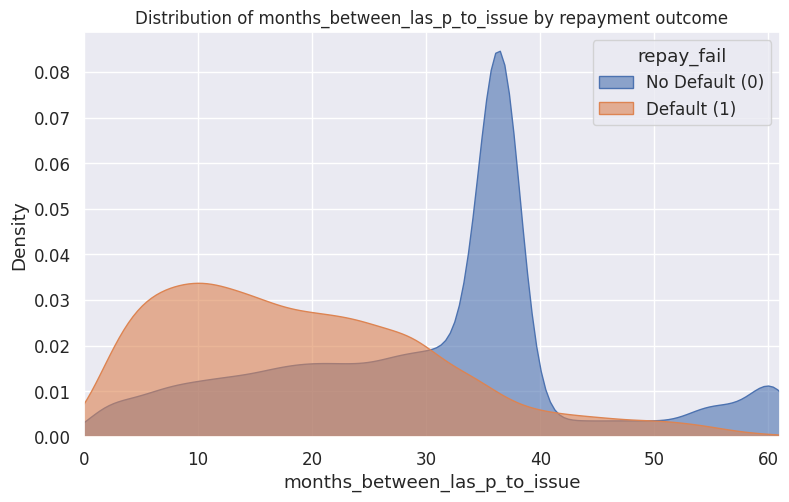

In [18]:
plt.figure(figsize=(8,5))

# KDE (density) plot
sns.kdeplot(data=df[df['repay_fail'] == 0], x='months_between_las_p_to_issue',
            label='No Default (0)', shade=True, alpha=0.6)
sns.kdeplot(data=df[df['repay_fail'] == 1], x='months_between_las_p_to_issue',
            label='Default (1)', shade=True, alpha=0.6)

plt.title("Distribution of months_between_las_p_to_issue by repayment outcome", fontsize=12)
plt.xlabel("months_between_las_p_to_issue")
plt.ylabel("Density")
plt.legend(title="repay_fail")
plt.xlim(0, df['months_between_las_p_to_issue'].quantile(0.99))  # חותך חריגים גבוהים
plt.grid(True)
plt.show()


In [19]:
neg_mask = df['months_between_earliest_to_issue'] < 0
print("כמה שליליים:", neg_mask.sum())
cols = ['earliest_cr_line', 'issue_d', 'months_between_earliest_to_issue']
display(df.loc[neg_mask, cols].sort_values('months_between_earliest_to_issue').head(50))

כמה שליליים: 0


,earliest_cr_line,issue_d,months_between_earliest_to_issue


**engineered features**

In [20]:
#Payment-to-Income ratio (PTI) —
df['payment_to_income'] = df['installment'] / (df['annual_inc'] / 12)


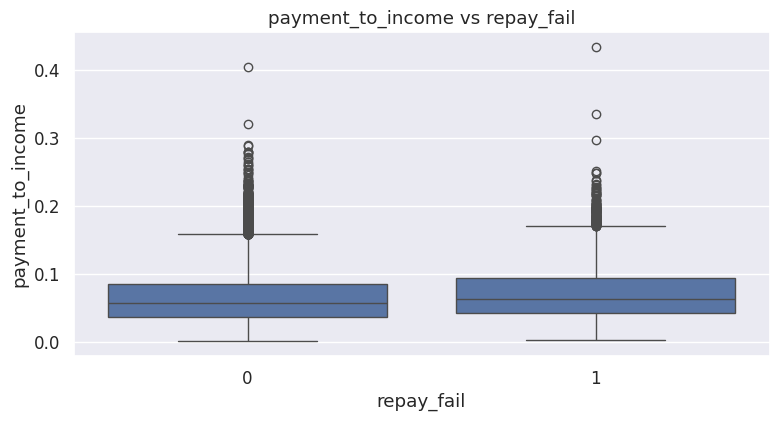

In [21]:
feature = "payment_to_income"
target = "repay_fail"
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y=feature, data=df)
plt.title(f"{feature} vs {target}")
plt.show()

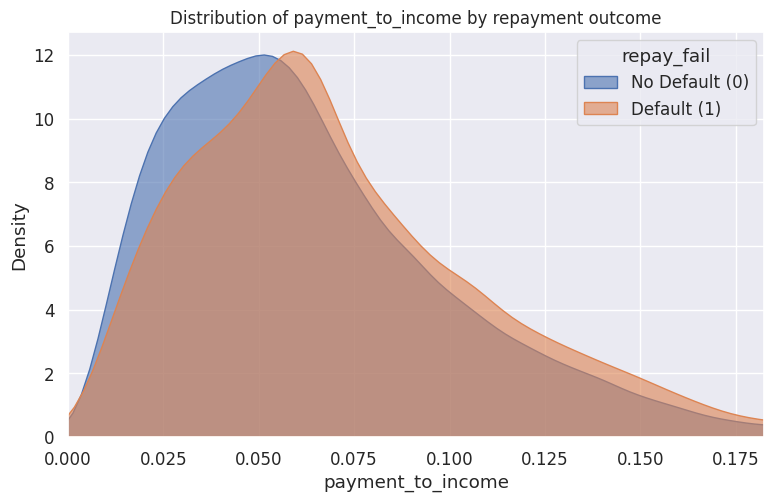

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# KDE (density) plot
sns.kdeplot(data=df[df['repay_fail'] == 0], x='payment_to_income',
            label='No Default (0)', shade=True, alpha=0.6)
sns.kdeplot(data=df[df['repay_fail'] == 1], x='payment_to_income',
            label='Default (1)', shade=True, alpha=0.6)

plt.title("Distribution of payment_to_income by repayment outcome", fontsize=12)
plt.xlabel("payment_to_income")
plt.ylabel("Density")
plt.legend(title="repay_fail")
plt.xlim(0, df['payment_to_income'].quantile(0.99))  # חותך חריגים גבוהים
plt.grid(True)
plt.show()


In [23]:
#Credit age in months — time between first credit line and loan issue - already calculated
df.rename(columns={'months_between_earliest_to_issue': 'credit_age_months'}, inplace=True)

In [24]:
#Credit stress indicators
df['inq_flag'] = (df['inq_last_6mths'] > 0).astype(int)
df['delinq_flag'] = (df['delinq_2yrs'] > 0).astype(int)

In [25]:

#Funding gap features
df['underfunded_amt']  = df['loan_amnt'] - df['funded_amnt_inv']       # loan not defunded כמה לא גויס ביחס לסכום ההלוואה
df['underfunded_rate'] = df['underfunded_amt'] / df['loan_amnt'].replace(0, np.nan)  #perc from tot loan_amount
df['platform_share_amt'] = df['funded_amnt'] - df['funded_amnt_inv']   # non investors loan amount כמה מומן לא ע"י משקיעים (פלטפורמה)
df['platform_share_rate'] = df['platform_share_amt'] / df['loan_amnt'].replace(0, np.nan) #perc from tot loan amount




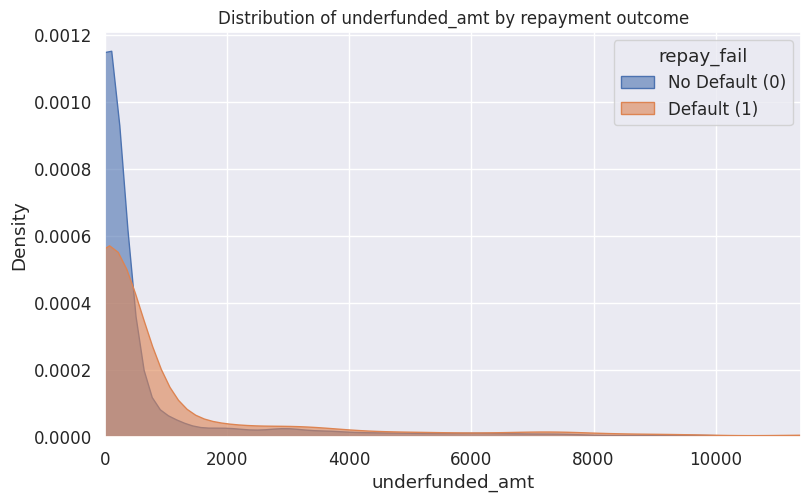

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# KDE (density) plot
sns.kdeplot(data=df[df['repay_fail'] == 0], x='underfunded_amt',
            label='No Default (0)', shade=True, alpha=0.6)
sns.kdeplot(data=df[df['repay_fail'] == 1], x='underfunded_amt',
            label='Default (1)', shade=True, alpha=0.6)

plt.title("Distribution of underfunded_amt by repayment outcome", fontsize=12)
plt.xlabel("underfunded_amt")
plt.ylabel("Density")
plt.legend(title="repay_fail")
plt.xlim(0, df['underfunded_amt'].quantile(0.99))  # חותך חריגים גבוהים
plt.grid(True)
plt.show()


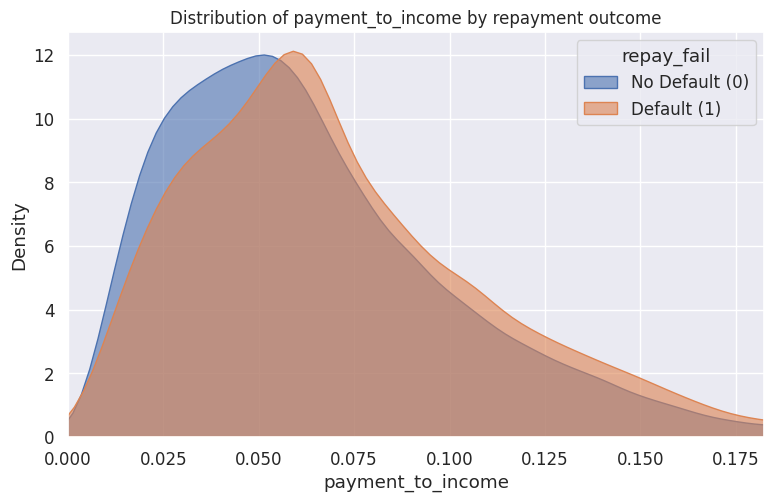

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# KDE (density) plot
sns.kdeplot(data=df[df['repay_fail'] == 0], x='payment_to_income',
            label='No Default (0)', shade=True, alpha=0.6)
sns.kdeplot(data=df[df['repay_fail'] == 1], x='payment_to_income',
            label='Default (1)', shade=True, alpha=0.6)

plt.title("Distribution of payment_to_income by repayment outcome", fontsize=12)
plt.xlabel("payment_to_income")
plt.ylabel("Density")
plt.legend(title="repay_fail")
plt.xlim(0, df['payment_to_income'].quantile(0.99))  # חותך חריגים גבוהים
plt.grid(True)
plt.show()


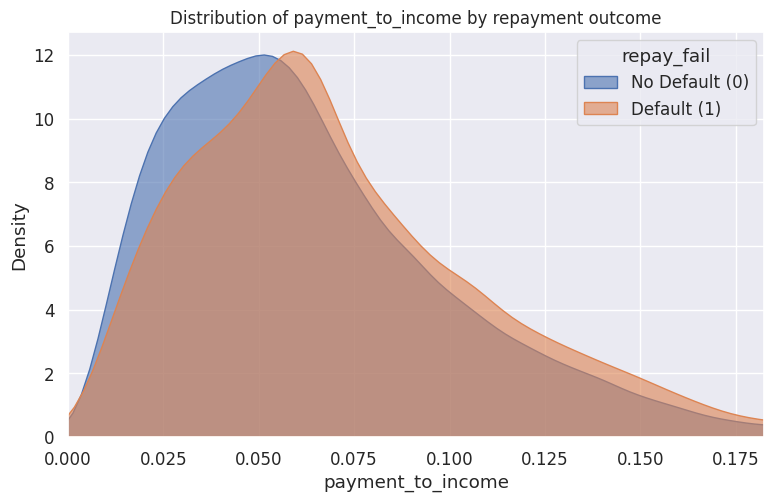

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# KDE (density) plot
sns.kdeplot(data=df[df['repay_fail'] == 0], x='payment_to_income',
            label='No Default (0)', shade=True, alpha=0.6)
sns.kdeplot(data=df[df['repay_fail'] == 1], x='payment_to_income',
            label='Default (1)', shade=True, alpha=0.6)

plt.title("Distribution of payment_to_income by repayment outcome", fontsize=12)
plt.xlabel("payment_to_income")
plt.ylabel("Density")
plt.legend(title="repay_fail")
plt.xlim(0, df['payment_to_income'].quantile(0.99))  # חותך חריגים גבוהים
plt.grid(True)
plt.show()


In [29]:

# --- 1) Make term_num = 36/60 from 'term' ---
# Extract the digits from strings like "36 months" / "60 month" / "36"
term_digits = (
    df['term']
      .astype(str)
      .str.extract(r'(\d+)', expand=False)
)

df['term_num'] = pd.to_numeric(term_digits, errors='coerce').astype('Int64')

# Keep only {36, 60}; anything else -> NaN (so we don't silently keep bad terms)
df['term_num'] = df['term_num'].where(df['term_num'].isin([36, 60]), pd.NA)

# Optional: quick sanity check
print("term_num unique:", df['term_num'].dropna().unique())

# --- 2) Ensure int_rate is numeric (handles strings like '13.5%' or '13.5') ---
ir = (df['int_rate']
        .astype(str)
        .str.replace('%','', regex=False)
        .str.strip())

ir = pd.to_numeric(ir, errors='coerce')

# If rates look like percentages (e.g., 13.5), convert to fraction (0.135)
if ir.dropna().max() > 1:
    ir = ir / 100.0

df['int_rate'] = ir  # overwrite with cleaned fraction

# --- 3) Compute your features ---
df['amount_x_rate'] = pd.to_numeric(df['loan_amnt'], errors='coerce') * df['int_rate']
df['rate_x_term']   = df['int_rate'] * df['term_num'].astype('float')

# (Optional) Replace infinities with NaN
df[['amount_x_rate','rate_x_term']] = df[['amount_x_rate','rate_x_term']].replace([np.inf, -np.inf], np.nan)


term_num unique: <IntegerArray>
[36, 60]
Length: 2, dtype: Int64


In [30]:
df['revol_util_log'] = np.log1p(df['revol_util'])
df['loan_amnt_log'] = np.log1p(df['loan_amnt'])
df['annual_inc_log'] = np.log1p(df['annual_inc'])
df['total_acc_log'] = np.log1p(df['total_acc'])

1. Data leakage (remove from model)

In [31]:
df_before_drop = df.copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             38478 non-null  int64         
 1   loan_amnt                      38478 non-null  Int64         
 2   funded_amnt_inv                38478 non-null  Int64         
 3   term                           38478 non-null  category      
 4   int_rate                       38478 non-null  float64       
 5   installment                    38478 non-null  float64       
 6   emp_length                     38478 non-null  category      
 7   home_ownership                 38478 non-null  category      
 8   annual_inc                     38478 non-null  float64       
 9   verification_status            38478 non-null  category      
 10  purpose                        38478 non-null  category      
 11  addr_state     

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['int_rate','term_num','installment','loan_amnt','annual_inc','dti','funded_amnt','funded_amnt_inv',
            'open_acc','revol_bal','revol_util','total_acc','inq_last_6mths','delinq_2yrs']

# Convert relevant columns to float64 to ensure compatibility
X = df[num_cols].astype('float64').dropna()

vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns).sort_values(ascending=False)
print(vif)
# הסר/אחד משתנים עם VIF מאוד גבוה (לרוב installment/loan_amnt).

funded_amnt        269.718206
loan_amnt          116.010716
installment         74.232848
funded_amnt_inv     45.835316
term_num            28.412032
int_rate            27.697817
open_acc            12.294635
total_acc           11.108925
revol_util           7.137394
dti                  7.013112
annual_inc           5.003162
revol_bal            2.229951
inq_last_6mths       1.792876
delinq_2yrs          1.188064
dtype: float64


In [32]:
to_drop = ['funded_amnt']
df = df.drop(columns=to_drop)

In [33]:
to_drop = ['issue_d','earliest_cr_line','last_pymnt_d']
df = df.drop(columns=to_drop)

In [ ]:
# Variables such as
# total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, and last_pymnt_amnt
# are all post-loan outcome variables — measured after loan issuance.

# Including them would cause data leakage, since they wouldn’t be known at the time of prediction.
# need to Exclude these columns from any predictive model.
# hi correlation colums from cleansing'funded_amnt', 'funded_amnt_inv', 'installment', 'loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'

In [34]:
# "List of leakage columns that should be removed"
leakage_cols = [
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'last_pymnt_amnt',
    'last_pymnt_d',
     'funded_amnt_inv',
    'installment'
]

to_drop = [c for c in leakage_cols if c in df.columns]

print("Dropping:", to_drop)
df = df.drop(columns=to_drop)


Dropping: ['total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'funded_amnt_inv', 'installment']


In [36]:
to_drop = ['total_pymnt']
df = df.drop(columns=to_drop)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             38478 non-null  int64   
 1   loan_amnt                      38478 non-null  Int64   
 2   term                           38478 non-null  category
 3   int_rate                       38478 non-null  float64 
 4   emp_length                     38478 non-null  category
 5   home_ownership                 38478 non-null  category
 6   annual_inc                     38478 non-null  float64 
 7   verification_status            38478 non-null  category
 8   purpose                        38478 non-null  category
 9   addr_state                     38478 non-null  category
 10  dti                            38478 non-null  float64 
 11  delinq_2yrs                    38478 non-null  float64 
 12  inq_last_6mths                 3

In [38]:
cont_cols_orig      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec','months_between_earliest_to_issue','months_between_las_p_to_issue','platform_share','underfunded','platform_share_1','underfunded_1']
# כל העמודות שלא מסוג 'category' (כולל int64/Int64/float64/Float64 וכו')
cont_cols_new = df.select_dtypes(exclude=['category']).columns.tolist()

corr_matrix = df[cont_cols_new].corr()   #(method='spearman')
corr_matrix


,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,months_between_las_p_to_issue,credit_age_months,payment_to_income,inq_flag,delinq_flag,underfunded_amt,underfunded_rate,platform_share_amt,platform_share_rate,term_num,amount_x_rate,rate_x_term,revol_util_log,loan_amnt_log,annual_inc_log,total_acc_log
id,1.000000,0.157716,0.021948,0.028755,0.081260,-0.024976,-0.180770,0.018394,-0.026507,-0.034528,0.072207,0.051969,-0.008226,0.861931,0.387710,0.038511,-0.018151,0.604285,0.092880,0.321280,0.040837,0.050684,0.099160,0.042752,-0.085581,-0.075925,-0.328839,-0.455696,-0.389032,-0.474803,0.242244,0.154107,0.172244,0.063230,0.127694,0.054334,0.070812
loan_amnt,0.157716,1.000000,0.281018,0.370552,0.071017,-0.048223,-0.052120,0.175485,-0.061484,0.274458,0.071952,0.253985,0.030838,0.139725,0.070116,-0.184338,-0.012429,0.153363,-0.009584,0.084336,-0.011750,0.076244,0.206029,0.523416,-0.022780,-0.030645,0.259219,0.042654,0.135738,-0.028718,0.344942,0.911420,0.377674,0.080875,0.913410,0.445009,0.279255
int_rate,0.021948,0.281018,1.000000,0.047722,0.124650,0.144944,0.181189,0.008779,0.090045,0.080006,0.473348,-0.055628,0.196890,-0.007996,0.031251,0.133928,-0.009706,0.051997,-0.011431,0.055535,-0.006509,0.067306,-0.132401,0.179416,0.179565,0.126728,0.056235,0.006289,0.041203,0.008875,0.413202,0.580538,0.844005,0.371285,0.227289,0.054254,-0.078603
annual_inc,0.028755,0.370552,0.047722,1.000000,-0.113817,0.014199,0.006511,0.235093,-0.027547,0.371299,0.040715,0.334785,-0.057204,0.032667,0.016737,-0.253435,-0.009234,0.033337,-0.009053,0.032317,-0.019416,0.012649,0.257319,-0.307771,0.017409,0.024145,0.091217,0.009420,0.059628,-0.010650,0.054987,0.318965,0.065544,0.030808,0.341211,0.860234,0.341574
dti,0.081260,0.071017,0.124650,-0.113817,1.000000,-0.033485,0.021571,0.307806,-0.000200,0.228175,0.282381,0.249176,0.045293,0.076167,0.014872,-0.053094,0.008122,0.089344,0.005568,0.115252,-0.001921,0.057670,0.063645,0.117685,0.019847,-0.035321,-0.004971,-0.020319,-0.017621,-0.027246,0.081720,0.106172,0.120684,0.298701,0.073140,-0.070949,0.273533
delinq_2yrs,-0.024976,-0.048223,0.144944,0.014199,-0.033485,1.000000,0.002641,0.009339,-0.009034,-0.060914,-0.045631,0.060216,0.018060,-0.024610,-0.013882,-0.065503,0.000817,-0.021660,0.003891,-0.016307,0.000278,-0.005207,0.060992,-0.057547,0.014312,0.731886,0.022488,0.037037,0.027399,0.040205,-0.003785,0.010525,0.085085,-0.039985,-0.047988,0.020733,0.069881
inq_last_6mths,-0.180770,-0.052120,0.181189,0.006511,0.021571,0.002641,1.000000,0.084424,0.051924,-0.019875,-0.041116,0.075800,0.106705,-0.212171,-0.006611,0.014622,-0.009604,-0.188620,-0.012846,-0.055834,0.004634,-0.086030,-0.044065,-0.043616,0.689504,0.018883,0.091409,0.138717,0.120060,0.153124,-0.013056,0.008803,0.095582,-0.020372,-0.047716,0.005820,0.062994
open_acc,0.018394,0.175485,0.008779,0.235093,0.307806,0.009339,0.084424,1.000000,0.002883,0.280774,-0.077981,0.697246,-0.008744,0.011627,0.004672,-0.235365,0.004918,0.021956,0.002029,0.076012,-0.012106,0.019881,0.235327,-0.066718,0.091494,0.015422,0.064249,0.029831,0.049931,0.016844,0.045315,0.151369,0.033824,0.021840,0.192471,0.303393,0.685389
pub_rec,-0.026507,-0.061484,0.090045,-0.027547,-0.000200,-0.009034,0.051924,0.002883,1.000000,-0.060676,0.062239,-0.014727,0.048388,-0.014034,-0.023729,-0.053843,-0.014383,-0.012476,-0.003702,0.030195,-0.005769,-0.000752,0.051137,-0.040023,0.040948,-0.000188,-0.003330,0.009733,-0.002808,0.010408,0.001666,-0.021372,0.054334,0.055435,-0.054328,-0.018725,0.002654
revol_bal,-0.034528,0.274458,0.080006,0.371299,0.228175,-0.060914,-0.019875,0.280774,-0.060676,1.000000,0.277657,0.299251,0.010728,-0.050586,0.006727,-0.254953,-0.009523,-0.008197,-0.004777,0.036771,-0.004177,0.027347,0.246778,-0.032621,-0.007886,-0.032150,0.130842,0.071339,0.113

In [46]:
##to_drop = ['id']
##df = df.drop(columns=to_drop)

In [39]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for c in cat_cols:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes   # NaN -> -1

In [40]:

df_sorted = df[sorted(df.columns)]


df_sorted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   addr_state                     38478 non-null  int8   
 1   amount_x_rate                  38478 non-null  Float64
 2   annual_inc                     38478 non-null  float64
 3   annual_inc_log                 38478 non-null  float64
 4   credit_age_months              38478 non-null  Int64  
 5   delinq_2yrs                    38478 non-null  float64
 6   delinq_flag                    38478 non-null  int64  
 7   dti                            38478 non-null  float64
 8   earliest_cr_line_month         38478 non-null  float64
 9   earliest_cr_line_year          38478 non-null  float64
 10  emp_length                     38478 non-null  int8   
 11  home_ownership                 38478 non-null  int8   
 12  id                             38478 non-null 

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge

In [42]:
y=df['repay_fail']
X = df.drop(columns=['repay_fail'])

In [43]:
# Drop datetime columns from X
datetime_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']
X = X.drop(columns=[col for col in datetime_cols if col in X.columns])


# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge model
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingClassifier().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestClassifier().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest','Ridge']].sum(axis=1)

# Output the results
print(selection_df)

              Feature              Lasso  SVM  GradientBoost  RandomForest  \
0                              id    1     1         1              1        
1                       loan_amnt    1     1         1              1        
2                            term    0     0         1              1        
3                        int_rate    0     0         1              1        
4                      emp_length    0     1         1              1        
5                  home_ownership    0     1         1              1        
6                      annual_inc    1     1         1              1        
7             verification_status    0     0         1              1        
8                         purpose    1     1         1              1        
9                      addr_state    1     1         1              1        
10                            dti    1     1         1              1        
11                    delinq_2yrs    0     1         1          

In [44]:
#Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 4]['Feature'].tolist()
df_model = df[final_var].copy()
df_model['repay_fail'] = df['repay_fail'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38478 non-null  int64  
 1   loan_amnt                      38478 non-null  Int64  
 2   emp_length                     38478 non-null  int8   
 3   home_ownership                 38478 non-null  int8   
 4   annual_inc                     38478 non-null  float64
 5   purpose                        38478 non-null  int8   
 6   addr_state                     38478 non-null  int8   
 7   dti                            38478 non-null  float64
 8   delinq_2yrs                    38478 non-null  float64
 9   inq_last_6mths                 38478 non-null  float64
 10  open_acc                       38478 non-null  float64
 11  pub_rec                        38478 non-null  float64
 12  revol_bal                      38478 non-null 

In [45]:
#df_model = df_model.drop(columns=['annual_inc_log'], errors='ignore')
df_model = df_model.drop(columns=['loan_amnt_log'], errors='ignore')


In [ ]:
df_model.info()

In [ ]:
df_model.head(10)

In [46]:
from google.colab import files
import os

with open("./pickles/load_default_feature_eng.pkl", 'wb') as f:
  pickle.dump(df_model, f)
  f.close()

# Get the list of files in the pickles directory
pickle_files = [f for f in os.listdir("./pickles/") if os.path.isfile(os.path.join("./pickles/", f))]

# Download each file individually
for file_name in pickle_files:
  files.download(os.path.join("./pickles/", file_name))

"pickles downloaded locally on your PC"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'pickles downloaded locally on your PC'